In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle


#importing datasets with audio features

hot_songs = pd.read_csv('hot_songs_final.csv') 
not_hot_songs = pd.read_csv('not_hot_songs_final.csv') 



## 1/ add hot or not column

In [2]:

hot_songs['hot_or_not'] = 'H'
not_hot_songs['hot_or_not'] = 'N'

# display(hot_songs)
# print()
# display(not_hot_songs)

## 2/ concat both dataframes 

In [3]:
hot_or_not = pd.concat([hot_songs, not_hot_songs], ignore_index=True)
hot_or_not.head()

,Unnamed: 0,track_name,artists,id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot_or_not
0,0,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,0.589,0.472,8,-8.749,1,0.0502,...,0.5050,0.898,67.196,audio_features,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267,4,H
1,1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7,-7.463,1,0.0384,...,0.0708,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107,4,H
2,2,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2,-8.463,1,0.0363,...,0.0652,0.806,119.705,audio_features,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973,4,H
3,3,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2,-12.472,1,0.0293,...,0.3550,0.947,107.682,audio_features,spotify:track:2FRnf9qhLbvw8fu4IBXx78,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,https://api.spotify.com/v1/audio-analysis/2FRn...,262960,4,H
4,4,a holly jolly christmas,burl ives,77khP2fIVhSW23NwxrRluh,0.683,0.375,0,-13.056,1,0.0303,...,0.0760,0.888,140.467,audio_features,spotify:track:77khP2fIVhSW23NwxrRluh,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,https://api.spotify.com/v1/audio-analysis/77kh...,135533,4,H


In [4]:
hot_or_not = hot_or_not.drop(columns="Unnamed: 0")

## 3/ drop audio features that seems irrelevant

In [5]:
# List of columns to drop
columns_to_drop = ["type", "uri", "track_href", "analysis_url", "duration_ms"]
# Drop the specified columns
hot_or_not_clean = hot_or_not.drop(columns=columns_to_drop)
hot_or_not.head()

,track_name,artists,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot_or_not
0,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,0.589,0.472,8,-8.749,1,0.0502,0.614,...,0.5050,0.898,67.196,audio_features,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267,4,H
1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7,-7.463,1,0.0384,0.164,...,0.0708,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107,4,H
2,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2,-8.463,1,0.0363,0.643,...,0.0652,0.806,119.705,audio_features,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973,4,H
3,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2,-12.472,1,0.0293,0.189,...,0.3550,0.947,107.682,audio_features,spotify:track:2FRnf9qhLbvw8fu4IBXx78,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,https://api.spotify.com/v1/audio-analysis/2FRn...,262960,4,H
4,a holly jolly christmas,burl ives,77khP2fIVhSW23NwxrRluh,0.683,0.375,0,-13.056,1,0.0303,0.579,...,0.0760,0.888,140.467,audio_features,spotify:track:77khP2fIVhSW23NwxrRluh,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,https://api.spotify.com/v1/audio-analysis/77kh...,135533,4,H


In [6]:
#droping the ID column to avoid confusion for the scaling & clustering

hot_or_not_IDless = hot_or_not_clean.drop(columns=["id","hot_or_not","track_name","artists"])
hot_or_not_IDless.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.589,0.472,8,-8.749,1,0.0502,0.614,0.000000,0.5050,0.898,67.196,4
1,0.336,0.627,7,-7.463,1,0.0384,0.164,0.000000,0.0708,0.350,150.273,4
2,0.754,0.424,2,-8.463,1,0.0363,0.643,0.000000,0.0652,0.806,119.705,4
3,0.735,0.478,2,-12.472,1,0.0293,0.189,0.000002,0.3550,0.947,107.682,4
4,0.683,0.375,0,-13.056,1,0.0303,0.579,0.000000,0.0760,0.888,140.467,4


## 4/ Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(hot_or_not_IDless)
hot_or_not_scaled = scaler.transform(hot_or_not_IDless)
filename = "hot_or_not_scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)
        
hot_or_not_scaled_df = pd.DataFrame(hot_or_not_scaled, columns = hot_or_not_IDless.columns)

display(hot_or_not_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.233684,-0.629880,0.795506,-0.023403,0.71586,-0.315313,0.854482,-0.574403,1.426630,1.598783,-1.765095,0.247877
1,-1.157075,-0.028978,0.511588,0.228388,0.71586,-0.413072,-0.469048,-0.574403,-0.762451,-0.419607,0.903065,0.247877
2,1.140701,-0.815966,-0.908005,0.032594,0.71586,-0.430470,0.939776,-0.574403,-0.790684,1.259929,-0.078679,0.247877
3,1.036257,-0.606619,-0.908005,-0.752344,0.71586,-0.488462,-0.395519,-0.574396,0.670384,1.779259,-0.464818,0.247877
4,0.750409,-1.005929,-1.475842,-0.866687,0.71586,-0.480178,0.751541,-0.574403,-0.736234,1.561951,0.588128,0.247877


## 5/ test different dimensional reduction technics
### a/ Testing PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(hot_or_not_scaled_df)
principal_components = pca.transform(hot_or_not_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,hot_or_not_scaled_df.shape[1]+1)])
principal_components_df.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12
0,0.165717,-1.683855,1.491213,0.196939,0.514882,0.040029,-1.640398,-0.620197,1.266471,0.525329,-0.158711,0.390358
1,-0.191615,0.614640,-1.027946,-0.618282,1.131375,-0.599551,-0.107022,-0.372491,-0.759736,0.275399,0.435571,0.187245
2,0.104021,-2.360655,-0.278631,-0.947515,-0.224891,0.235890,0.392530,-0.090368,0.034502,0.152902,-0.337867,0.132375
3,-0.343981,-1.866645,0.447539,-0.957770,-0.540203,0.360718,-0.278095,0.026124,1.255827,0.017338,1.055600,0.224605
4,0.457463,-2.261054,-0.415934,-1.465651,-0.363345,-0.013053,1.073070,-0.104416,0.416721,0.411671,0.500423,0.014637


In [9]:
print(pca.explained_variance_ratio_)
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.24242337 0.12962536 0.11270292 0.09256892 0.08072898 0.07520532
 0.06963452 0.06475219 0.05647385 0.036182   0.02778748 0.01191509]


[0.24242336964029101,
 0.3720487277313033,
 0.4847516434442878,
 0.5773205641103382,
 0.6580495473494533,
 0.7332548689413809,
 0.8028893902099404,
 0.8676415763792336,
 0.9241154293537169,
 0.9602974330410359,
 0.9880849145554056,
 1.0]

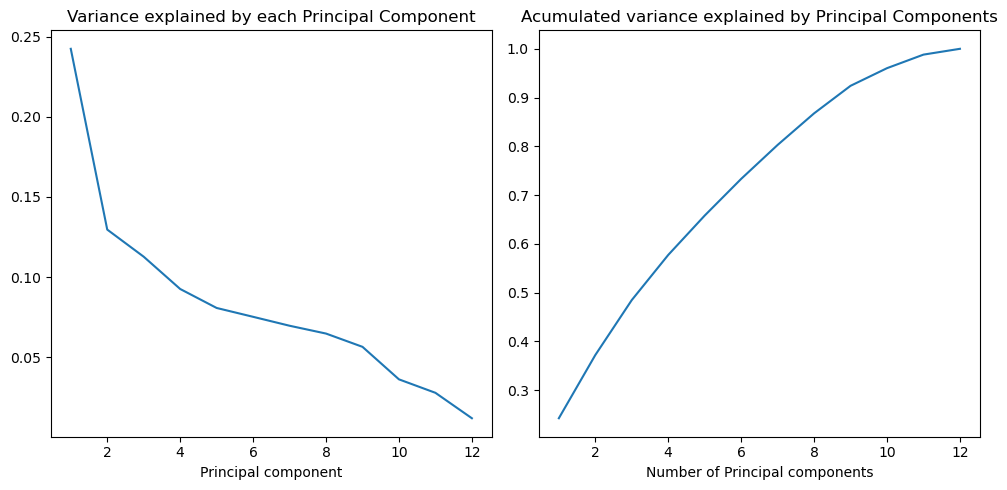

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,13), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,13),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

### b/ Testing Isomap

In [11]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=3)
iso.fit(hot_or_not_scaled_df)
hot_or_not_isomap_transformed = iso.transform(hot_or_not_scaled_df)
hot_or_not_isomap_transformed_df = pd.DataFrame(hot_or_not_isomap_transformed, columns=["ISO_1","ISO_2","ISO_3"])
hot_or_not_isomap_transformed_df.head()

,ISO_1,ISO_2,ISO_3
0,-3.158426,0.012990,2.413155
1,-3.156643,-0.120361,-1.712517
2,-4.189643,0.446756,2.347632
3,-4.342947,-0.618141,0.777192
4,-3.766225,0.698679,2.423661


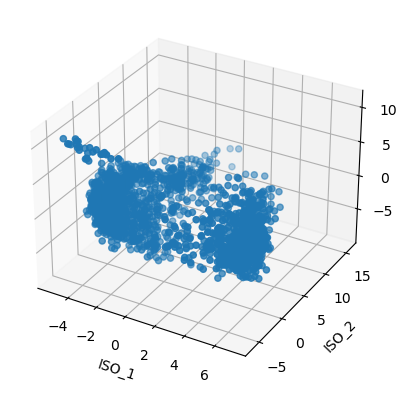

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Replace 'hot_or_not_isomap_transformed_df' with your actual DataFrame
x = hot_or_not_isomap_transformed_df['ISO_1']
y = hot_or_not_isomap_transformed_df['ISO_2']
z = hot_or_not_isomap_transformed_df['ISO_3']

ax.scatter(x, y, z)

ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
ax.set_zlabel("ISO_3")

plt.show()

### c/ Testing UMAP

In [13]:
from umap import UMAP

reducer = UMAP(n_components=2,random_state=42)
reducer.fit(hot_or_not_scaled_df)

hot_or_not_umap_transformed = reducer.transform(hot_or_not_scaled_df)
hot_or_not_umap_transformed_df = pd.DataFrame(hot_or_not_umap_transformed, columns=["UMAP_1","UMAP_2"])
hot_or_not_umap_transformed_df.head()

C:\Users\antho\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,9.416348,9.492880
1,9.185616,11.370852
2,10.499352,7.897077
3,10.866833,8.291434
4,10.474443,7.818885


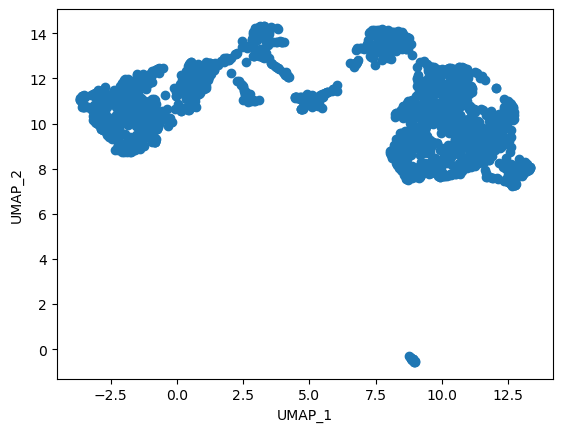

In [14]:
fig, ax = plt.subplots()
ax.scatter(hot_or_not_umap_transformed_df ['UMAP_1'], hot_or_not_umap_transformed_df ['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

# Clustering
## 1/ Using HDBSCAN

In [15]:
# 6/ select clustering method most performant for our dataset
#from the umap dim reduction, seems that more or less 5 groups appear with sufficient distance and concentration



#we are selecting HD

In [17]:
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator

from dbcv import *

In [18]:
# 7/ run it 
# Creating the clustering model
#model = HDBSCAN() # Default values are: eps=0.5, min_samples=5
#model = HDBSCAN(min_cluster_size=10,min_samples=5)
import os
model = HDBSCAN(min_cluster_size=30,min_samples=7)

path = "models/"
    # Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "HDBSCAN.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(model, file) # Replace "variable" with the name of the variable that contains your transformer

# HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that's often used for discovering clusters of varying shapes and sizes in data. The key advantage of HDBSCAN is its ability to handle clusters of different densities. When using HDBSCAN, you may need to adjust several parameters to achieve optimal results. Here are the main parameters of HDBSCAN:
# min_samples:
# This parameter sets the minimum number of samples required to form a dense region. It determines the smallest cluster that can be formed. Smaller values make clusters more sensitive to noise, while larger values may result in fewer and larger clusters.
# min_cluster_size:
# It sets the minimum number of points required to form a cluster. Clusters smaller than this size are treated as noise. Adjusting this parameter influences the granularity of the clustering. Larger values lead to larger clusters and potentially more noise.
# metric:
# This parameter defines the distance metric used for calculating distances between points. Common choices include Euclidean distance, Manhattan distance, or other appropriate distance metrics based on your data.
# alpha:
# The alpha parameter influences the size of the neighborhood around each point. It's a scaling factor for the neighborhood, determining the number of neighbors a point must have to be considered part of a cluster. Smaller values make clusters more tightly packed.
# cluster_selection_method:
# This parameter determines the method used to select the final clusters. Options include 'eom' (Excess of Mass), 'leaf' (Cluster hierarchy leaf), or None for no automatic cluster selection.
# allow_single_cluster:
# If set to True, this parameter allows HDBSCAN to assign all points to a single cluster if no clusters can be found that meet the criteria specified by min_cluster_size and min_samples.




# fit model and predict clusters
hot_or_not_clustered = model.fit_predict(hot_or_not_umap_transformed_df) # .fit(X_scaled_df)

pd.Series(hot_or_not_clustered).value_counts().sort_index()

The new directory is created!


-1     71
 0     87
 1     35
 2    149
 3    160
 4    491
 5    926
 6     89
 7     52
 8     65
Name: count, dtype: int64

In [19]:
hot_or_not_umap_transformed_df.shape

(2125, 2)

In [ ]:
# dbcv_score = round(DBCV(hot_or_not_umap_transformed_df.iloc[:,:2].to_numpy(), hot_or_not_clustered, dist_function=euclidean))
# print("The DBCV score is {:.2f}".format(dbcv_score))

In [20]:
hot_or_not_umap_transformed_df['cluster'] = hot_or_not_clustered
hot_or_not_umap_transformed_df.head()

,UMAP_1,UMAP_2,cluster
0,9.416348,9.492880,5
1,9.185616,11.370852,5
2,10.499352,7.897077,5
3,10.866833,8.291434,5
4,10.474443,7.818885,5


In [21]:
hot_or_not_umap_transformed_df.shape

(2125, 3)

C:\Users\antho\AppData\Local\Temp\ipykernel_9204\1310739532.py:6: UserWarning: The palette list has more values (2125) than needed (10), which may not be intended.
  sns.scatterplot(hot_or_not_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);


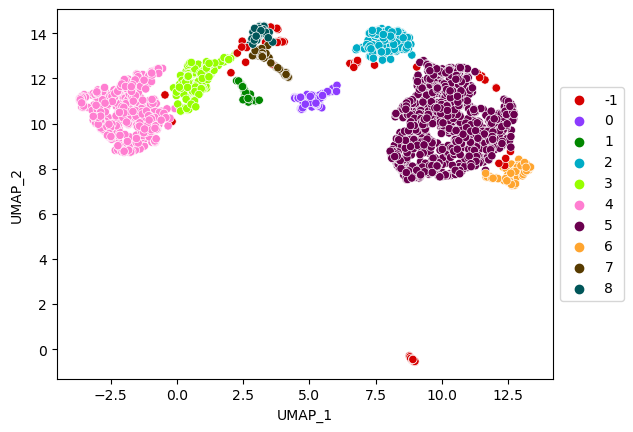

In [22]:

# Creating a pallette of hihg contrast colors with as many color as cluster labels
#custom_palette = sns.color_palette(cc.glasbey, n_colors=cluster.size)
custom_palette = sns.color_palette(cc.glasbey, n_colors=hot_or_not_clustered.size)#n_colors=cluster.size
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
#custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(cluster,custom_palette)]
sns.scatterplot(hot_or_not_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Removing the noise: 

In [ ]:
# hot_or_not_cluster_df = pd.concat([hot_or_not, hot_or_not_umap_transformed_df['cluster']], axis=1)
# hot_or_not_cluster_df

In [ ]:
# hot_or_not_cluster_df_no_noise = hot_or_not_umap_transformed_df[hot_or_not_umap_transformed_df['cluster'] != -1]
# hot_or_not_cluster_df_no_noise

In [ ]:
# # fit model and predict clusters again
# model = HDBSCAN(min_cluster_size=30,min_samples=7)

# hot_or_not_cluster_df_no_noise2 = model.fit_predict(hot_or_not_cluster_df_no_noise) # .fit(X_scaled_df)

# pd.Series(hot_or_not_cluster_df_no_noise2).value_counts().sort_index()

In [ ]:
# hot_or_not_umap_transformed_df['cluster'] = hot_or_not_cluster_df_no_noise2
# hot_or_not_umap_transformed_df.head()

## 2/ Using KMEAN

## Concat hot_or_not df with cluster

In [25]:
#adding cluster kmean to the original dataframe
hot_or_not["cluster_kmean"] = clusters2
hot_or_not.head()

NameError: name 'clusters2' is not defined

In [27]:
#Saving the updated dataframe as CSV
# hot_or_not.to_csv('hot_or_not_clustered.csv', index=False)

hot_or_not_scaled_df.to_csv('hot_or_not_scaled_df.csv', index=False)